In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [9]:
# Datos que desbordan la memoria
data = {
    'Celsius': [-10, 0, 10, 20, 30, 40, 50, 60, 70, 80],
    'Fahrenheit': [14, 32, 50, 68, 86, 104, 122, 140, 158, 176]
}

# Convertir el conjunto de datos a un dataframe
datos = pd.DataFrame.from_dict(data)

In [10]:
# Datos originales
X = datos['Celsius'].values
y = datos['Fahrenheit'].values

In [11]:
# Datos estandarizados
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X = scaler_x.fit_transform(X.reshape(-1, 1))
y = scaler_y.fit_transform(y.reshape(-1, 1))

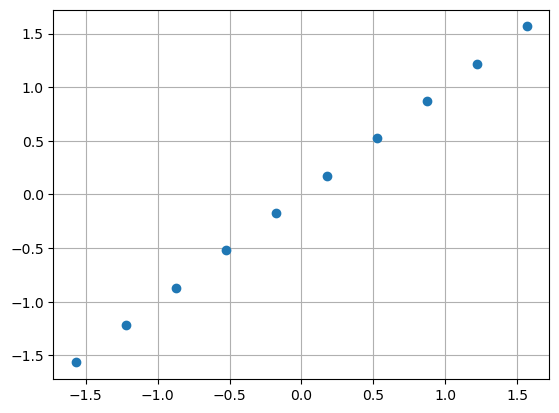

In [12]:
# Graficar los datos
plt.scatter(x=X, y=y, zorder=2)
plt.grid(True, zorder=0)
plt.show()

In [13]:
# Definimos la predicción del modelo
def prediccion(x, w, b):
    return w * x + b

# Campo escalar: Función de coste
def ECM(y, y_pred):
    return (1/len(y)) * np.sum((y - y_pred)**2)

# Campo vectorial: Gradiente de la función de coste
# ∇ECM = (∂ECM/∂w, ∂ECM/∂b)
def gradiente_ECM(X, y, y_pred):
    dw = -(2/len(y)) * np.sum((y - y_pred) * X)  # ∂ECM/∂w
    db = -(2/len(y)) * np.sum(y - y_pred)        # ∂ECM/∂b
    return np.array([dw, db])  # Vector gradiente

In [14]:
# Variables de información
coste_actu = {'ECM': []}
params_hist = {'w': [], 'b': []}

# Definir los parámetros del modelo que debe optimizar
w, b = 0, 0

# Definimos los hiperparámetros (para datos no normalizados)
# lr = 0.002
# epocas = 3000

# Definimos los hiperparámetros (para datos normalizados)
lr = 0.1
epocas = 50

# Actualizamos X veces los parámetros para que se optimicen a un punto local mínimo de la función de coste
for _ in range(epocas):
    # Guardamos el historial de los parámetros
    params_hist['w'].append(w)
    params_hist['b'].append(b)
    
    # Calculo la predicción del modelo
    y_pred = prediccion(x=X, w=w, b=b)

    # calculamos el error
    error = ECM(y, y_pred)
    coste_actu['ECM'].append(error)

    # Calcular la dirección de crecimiento del gradiente con respecto a cada parámetro
    dw, db = gradiente_ECM(X, y, y_pred)

    # Actualizar los parámetros en dirección contraria del gradiente
    w = w - lr * dw
    b = b - lr * db
    
# Reescalar los datos a su valor original
w_real = (scaler_y.scale_[0] / scaler_x.scale_[0]) * w
b_real = scaler_y.scale_[0] * b + scaler_y.mean_[0] - w_real * scaler_x.mean_[0]

print(f"Peso: {w_real:.2f}, Sesgo: {b_real:.2f}")
# print(f"Peso: {w:.2f}, Sesgo: {b:.2f}")

Peso: 1.80, Sesgo: 32.00


In [15]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
ax.scatter(X, y, label='Datos')
line, = ax.plot([], [], color='r', label='Regresión Lineal')
ax.grid(True)
ax.legend()
plt.close(fig)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    w_frame = params_hist['w'][frame]
    b_frame = params_hist['b'][frame]
    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = w_frame * x_range + b_frame
    line.set_data(x_range, y_range)
    ax.set_title(f'Época {frame + 1}/{epocas}')
    return line,

ani = FuncAnimation(fig, update, frames=range(epocas), init_func=init, blit=True, interval=100)

HTML(ani.to_jshtml())

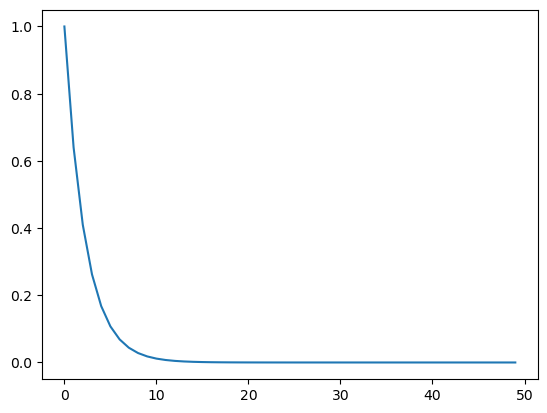

In [16]:
# Graficamos el error
plt.plot(coste_actu['ECM'])
plt.show()